In [32]:
#!pip3 install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25847 sha256=dc77518c8dd404e473d08231c49ee5480d8ecfd167077ffce0e070271ce6b1d9
  Stored in directory: c:\users\sidik\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [35]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
import pathlib
import warnings
import matplotlib.pyplot as plt
import random
import shutil
import imutils
from skimage import exposure

In [11]:
from sklearn.utils import all_estimators
IMAGE_SIZE = 256

# a path do dataset

train_data  =(r'C:\Users\Sidik\Desktop\Mono\Train_baseline\train')

Nomes = ['Benign', 'Malign', 'Normal']
i0 = 0
i1 = 0
i2 = 0
i3 = 0
i4 = 0

num_class = 3
print(train_data)



C:\Users\Sidik\Desktop\Mono\Train_baseline\train


In [12]:
os.listdir(train_data)

['000', '001', '002']

In [20]:
def load_data(data_directory):
  
    directories = [d for d in os.listdir(data_directory)
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    file_names = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names += [os.path.join(label_directory, f)
                       for f in os.listdir(label_directory)]
                       
    random.shuffle(file_names)

    for f in file_names:
        #print(f)
        img = cv.imread(f)
        img = cv.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        dirname = os.path.split(os.path.dirname(f))[1]

        images.append(img)
        labels.append(int(dirname))

    images, labels = np.asarray(images), np.asarray(labels)
    images = images.astype('float32') / float(255)

    return images, labels

In [21]:
imagens, labels = load_data(train_data)

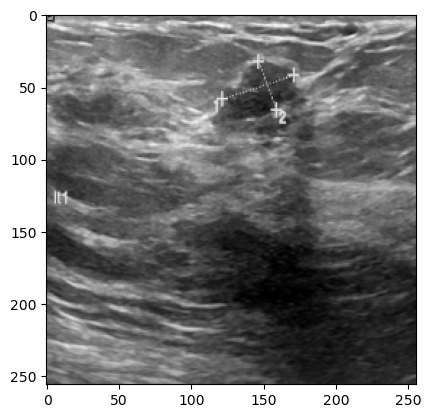

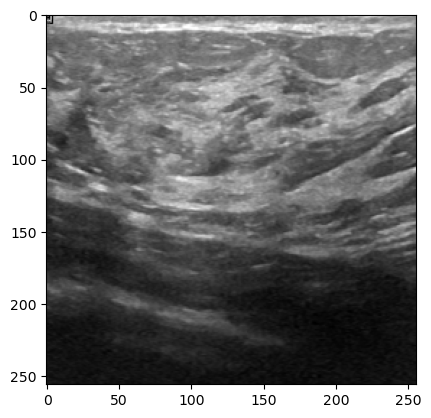

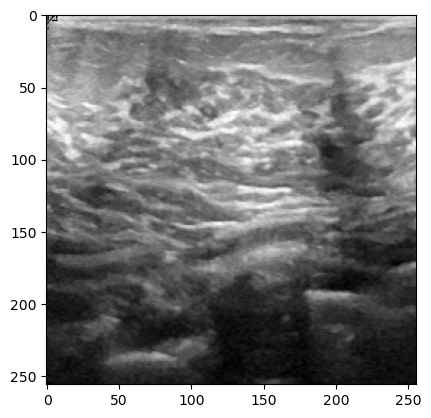

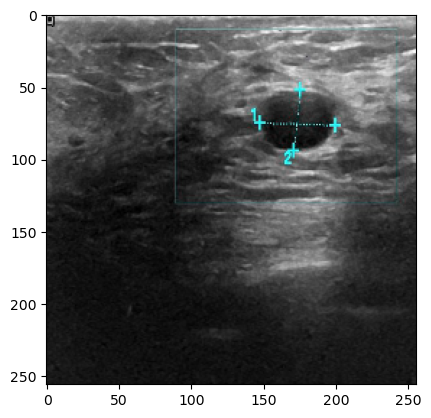

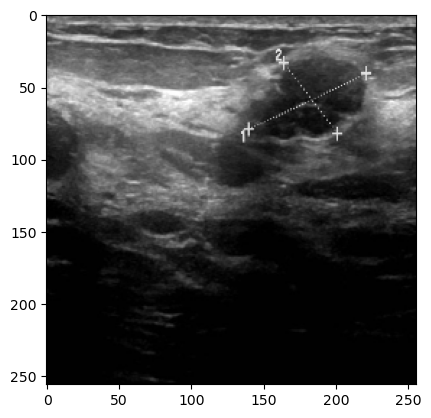

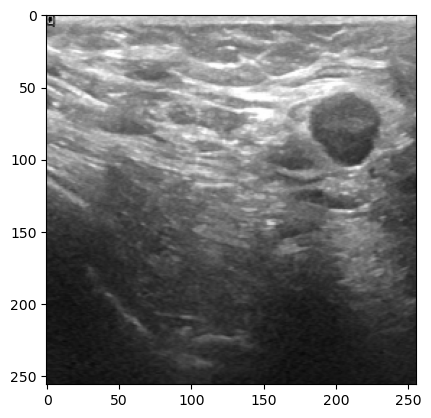

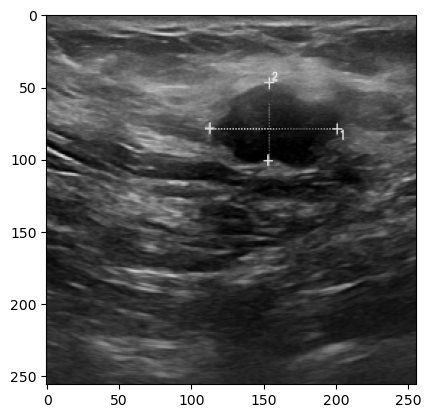

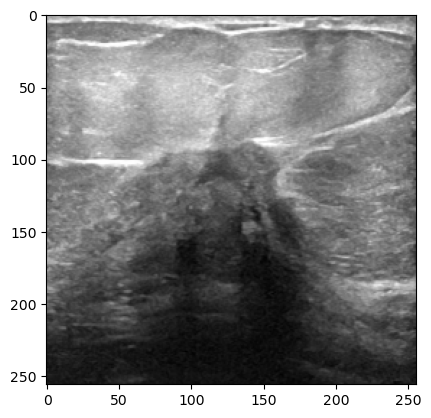

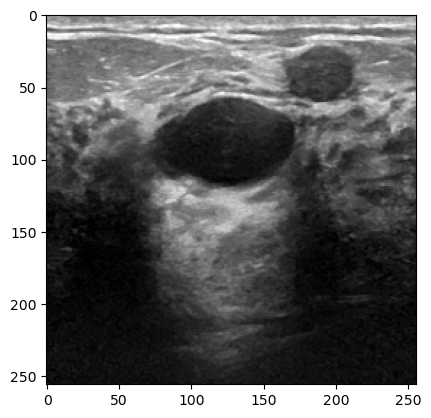

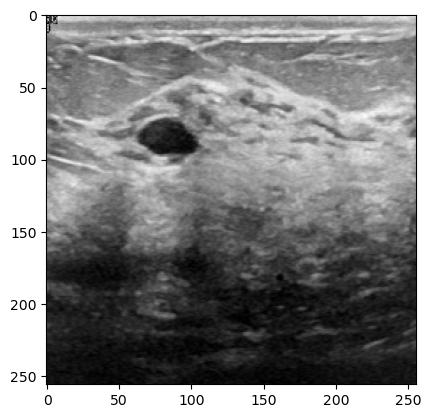

In [23]:
imagens.shape
for x in range(0,10):
  plt.figure()
  plt.imshow(imagens[x])
  plt.show()


In [24]:
def preprocess(image, width, height, inter=cv.INTER_AREA):
    width = width
    height = height
    inter = inter

    (h, w) = image.shape[:2]
    dW = 0
    dH = 0
  
    if w < h:
        image = imutils.resize(image, width=width, inter=inter)
        dH = int((image.shape[0] - height) / 2.0)
    else:
        image = imutils.resize(image, height=height,inter=inter)
        dW = int((image.shape[1] - width) / 2.0)

    (h, w) = image.shape[:2]
    image = image[dH:h - dH, dW:w - dW]

    return cv.resize(image, (width, height),interpolation=inter)




In [25]:
def rotate(image, angle):

    rows, cols, c = image.shape
    M = cv.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    image = cv.warpAffine(image, M, (cols, rows))

    return image

In [26]:
def flip (image, vflip=False, hflip=False):

    if hflip or vflip:
        if hflip and vflip:
            c = -1
        else:
            c = 0 if vflip else 1
        image = cv.flip(image, flipCode=c)
    return image

def contrast (image,ksize):

    image = cv.Sobel(image,cv.CV_64F,1,0,ksize=ksize)

    return image

def averageing_blur(image,shift):
    image=cv.blur(image,(shift,shift))
    return image

def erosion_image(image,shift):
    kernel = np.ones((shift,shift),np.uint8)
    image = cv.erode(image,kernel,iterations = 1)
    return image

def dilation_image(image,shift):
    kernel = np.ones((shift, shift), np.uint8)
    image = cv.dilate(image,kernel,iterations = 1)
    return image

def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv.LUT(image, table)


# Contrast stretching
def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img_rescale

# Histogram equalization
def HE(img):
    img_eq = exposure.equalize_hist(img)
    return img_eq

# Adaptive histogram equalization
def AHE(img):
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    return img_adapteq

In [27]:
def save_image(img, pathfoto, type):

    global  i0, i1, i2, i3, i4

    dirname = os.path.split(os.path.dirname(pathfoto))[1]

    if int(dirname) == 0:
        i0 += 1
        cv.imwrite(os.path.dirname(pathfoto) + "/" + Nomes[int(dirname)]+str(i0) +type + ".png", img)
    if int(dirname) == 1:
        i1 += 1
        cv.imwrite(os.path.dirname(pathfoto) + "/" + Nomes[int(dirname)]+str(i1) +type + ".png", img)
    if int(dirname) == 2:
        i2 += 1
        cv.imwrite(os.path.dirname(pathfoto) + "/" + Nomes[int(dirname)]+str(i2) +type + ".png", img)
    if int(dirname) == 3:
        i3 += 1
        cv.imwrite(os.path.dirname(pathfoto) + "/" + Nomes[int(dirname)]+str(i3) +type + ".png", img)

In [28]:
def data_augmentation(data_directory):

    global i0

    directories = [d for d in os.listdir(data_directory)
                   if os.path.isdir(os.path.join(data_directory, d))]
    file_names = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names += [os.path.join(label_directory, f)
                       for f in os.listdir(label_directory)]

    for f in file_names:
        print(f)
        img = cv.imread(f)
        img = preprocess(img, IMAGE_SIZE, IMAGE_SIZE)

        # cv.imwrite(f, img)

        img1 = contrast_stretching(img)
        img_fv = flip(img1, vflip=True, hflip=False) #flip vertical
        save_image(img_fv, f, 'flipvert')

        img2 = HE(img)
        img2 = img2*255
        save_image(img2, f, 'he')

        img_fh = flip(img, vflip=False, hflip=True) #flip vertical
        save_image(img_fh, f, 'fliphori')

        img3 = HE(img)
        img3 = img3*255
        save_image(img3, f, 'ahe')

        print("Done it")

        


In [36]:
data_augmentation(train_data)

C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (100).png


C:\Users\Sidik\anaconda3\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (101).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (102).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (103).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (104).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (105).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (106).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (107).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (108).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (109).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (110).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (111).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (112).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\nor

Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\000\normal (99).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (100).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (101).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (102).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (103).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (104).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (105).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (106).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (107).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (108).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (109).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (110).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\beni

Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (204).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (205).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (206).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (207).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (208).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (209).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (210).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (211).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (212).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (213).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (214).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (215).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\ben

Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (310).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (311).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (312).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (313).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (314).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (315).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (316).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (317).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (318).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (319).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (32).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (320).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\beni

Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (416).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (417).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (418).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (419).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (420).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (421).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (422).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (423).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (424).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (425).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (426).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\benign (427).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\001\ben

Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (164).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (165).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (166).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (167).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (168).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (169).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (170).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (171).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (172).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (173).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (174).png
Done it
C:\Users\Sidik\Desktop\Mono\Train_baseline\train\002\malignant (175).png
Done it
C:\Users\Sidik\Deskt